# Deals - GradientBoostingRegressor
## Import and Load the Data

In [1]:
import warnings
import os
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from bidi import algorithm as bidialg

%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
except Exception:
    print("Seems we have a problem")

In [3]:
print("File Columns are:", df.columns)
print("Number of rows:", df.shape[0])

File Columns are: Index(['sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'final_price', 'sale_day_year',
       'sale_day_month', 'street', 'street_number', 'neighborhood',
       'address_area', 'address_neighborhood'],
      dtype='object')
Number of rows: 474665


## Choosing the features

In [4]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city',
    'sale_day_year'
]

### Define remove outliers method

In [5]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


## Retrieve Cities Names


In [6]:

_cities = df['city'].unique()

cities = []
for city in _cities:
    _df = df.loc[(df['city'] == city)]    
    if len(_df.index) > 250:
        cities.append(city)

test_size = 0.3

cities = {city: {"processor": None, "algo": None, "mse": None, "fig": None} for city in cities if '/' not in city}

print("Total number of cities is:", len(cities))


Total number of cities is: 77


## Running the Algo

חיפה
R2 Score: 0.8331
MSE sqrt: 209388.1455


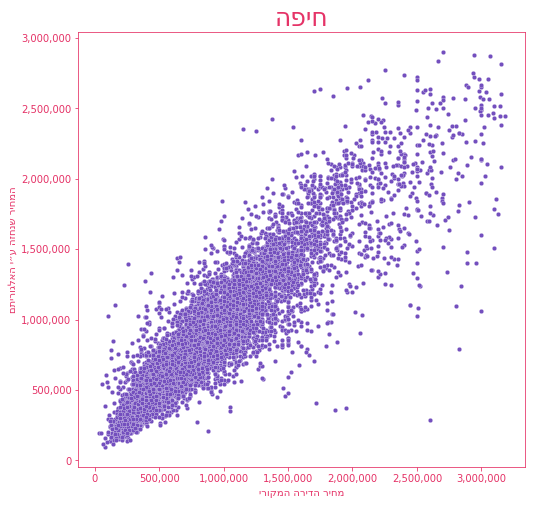

תל אביב יפו
R2 Score: 0.7570
MSE sqrt: 591640.6565


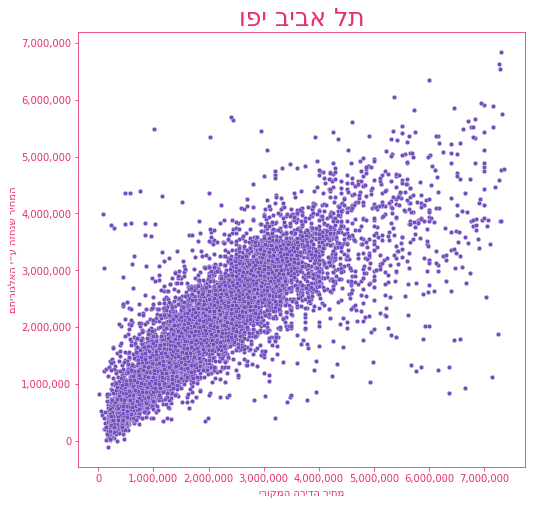

ירושלים
R2 Score: 0.8025
MSE sqrt: 315980.3539


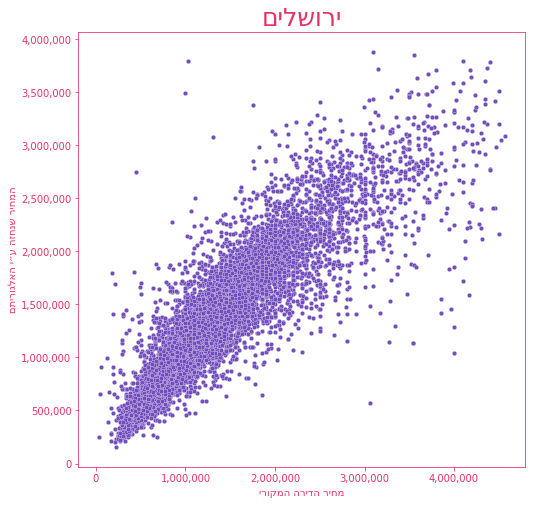

רעננה
R2 Score: 0.7876
MSE sqrt: 341747.7844


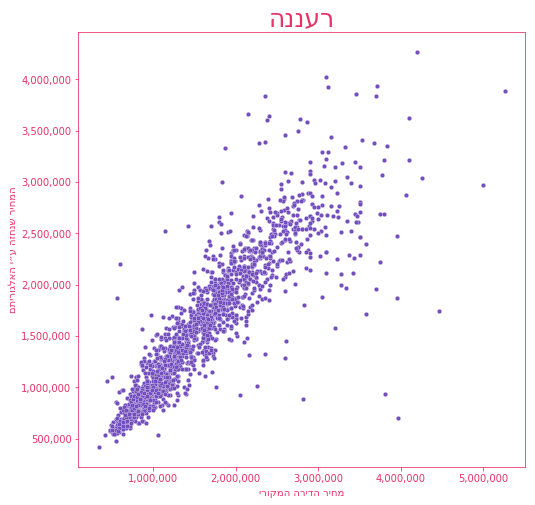

הוד השרון
R2 Score: 0.8526
MSE sqrt: 276137.3707


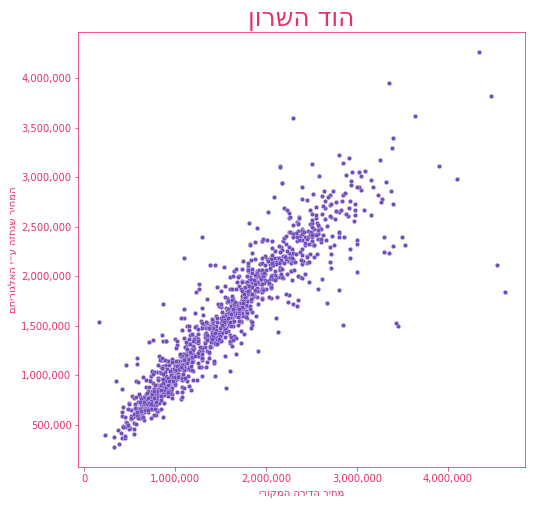

רמת השרון
R2 Score: 0.8375
MSE sqrt: 411572.5156


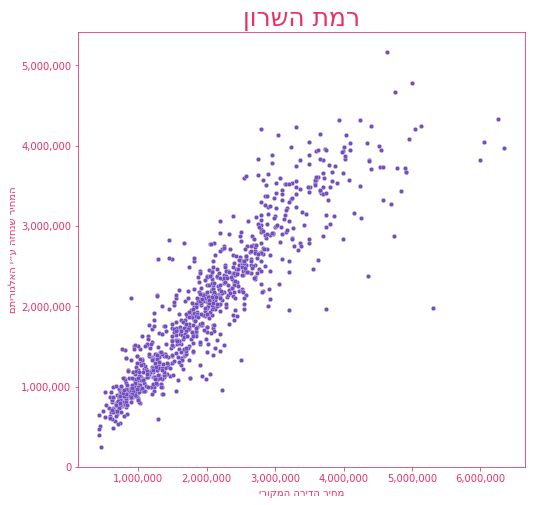

פתח תקווה
R2 Score: 0.8998
MSE sqrt: 178971.9791


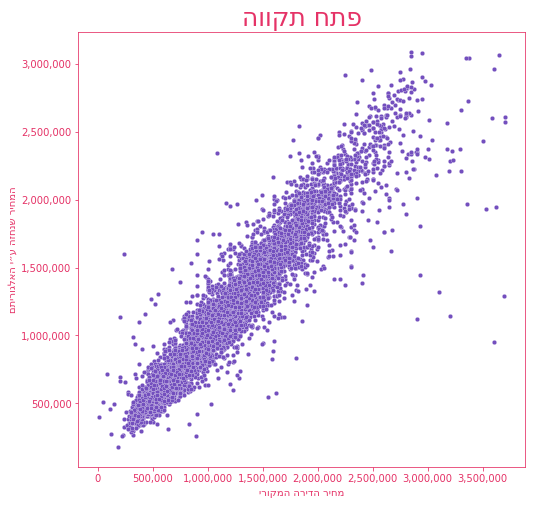

נס ציונה
R2 Score: 0.8294
MSE sqrt: 263231.3810


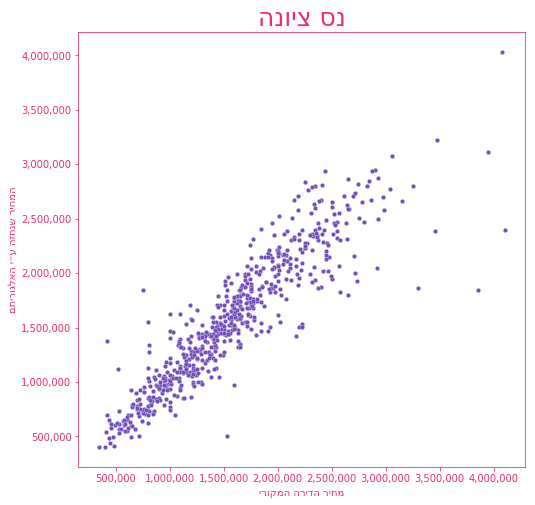

הרצליה
R2 Score: 0.7639
MSE sqrt: 449902.2083


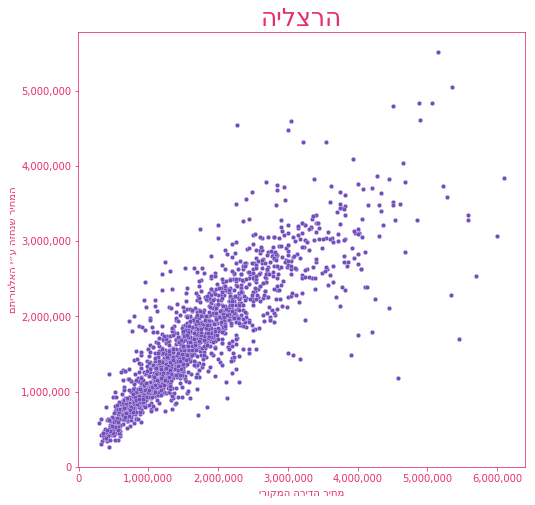

גבעתיים
R2 Score: 0.8278
MSE sqrt: 373666.6565


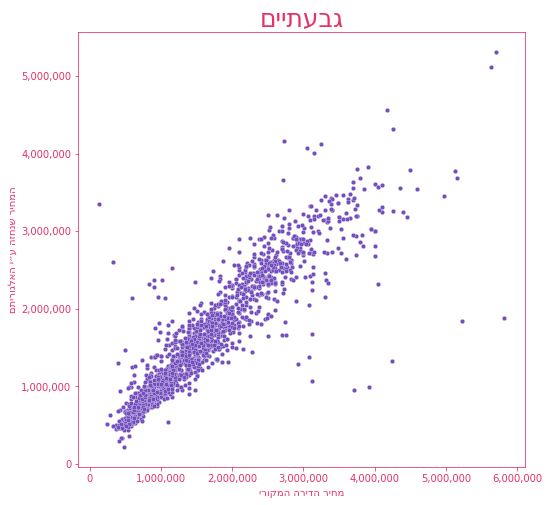

רמת גן
R2 Score: 0.8514
MSE sqrt: 266595.3898


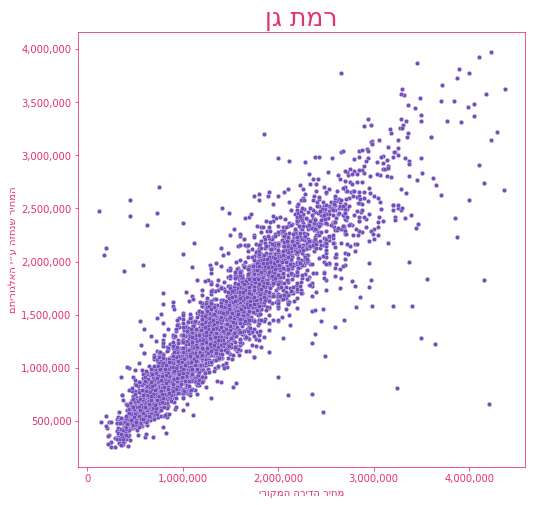

בני ברק
R2 Score: 0.8617
MSE sqrt: 176446.9714


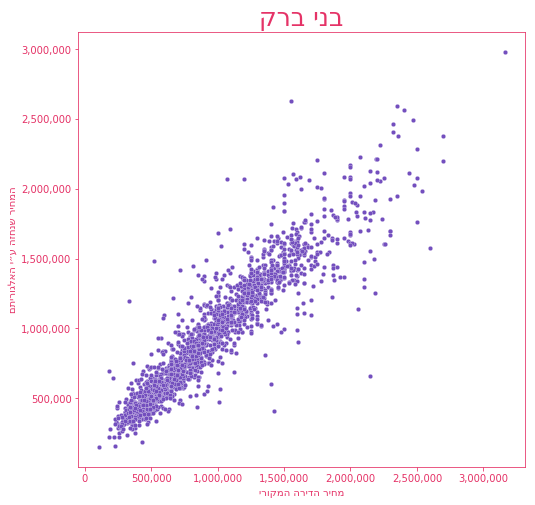

פרדס חנה כרכור
R2 Score: 0.7842
MSE sqrt: 198884.1447


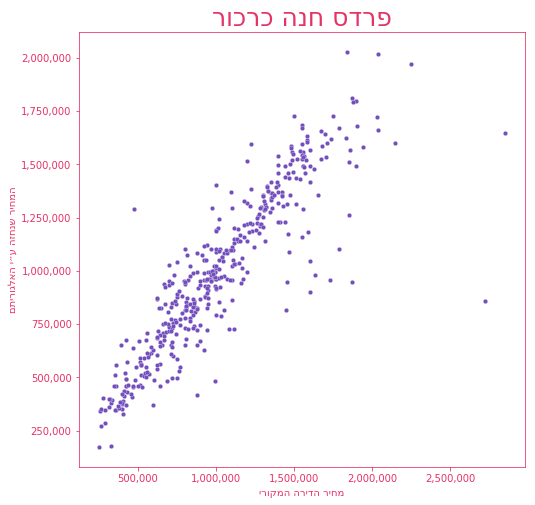

גדרה
R2 Score: 0.8117
MSE sqrt: 180095.1077


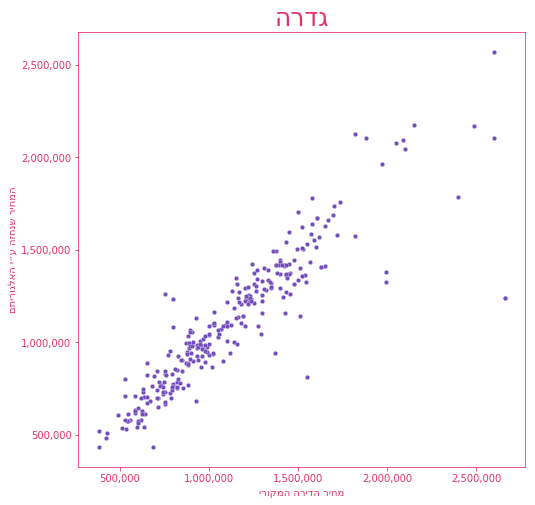

חולון
R2 Score: 0.9027
MSE sqrt: 173755.7077


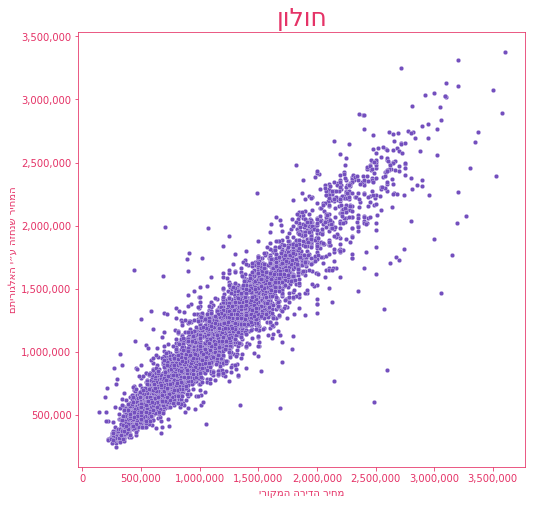

נתניה
R2 Score: 0.8713
MSE sqrt: 222606.9831


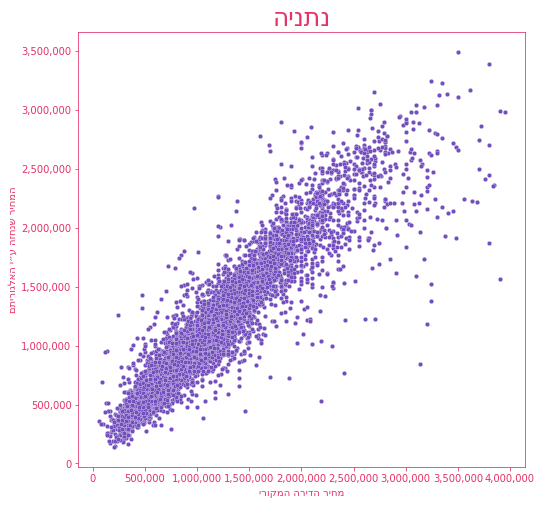

גן יבנה
R2 Score: 0.0355
MSE sqrt: 1025485.1205


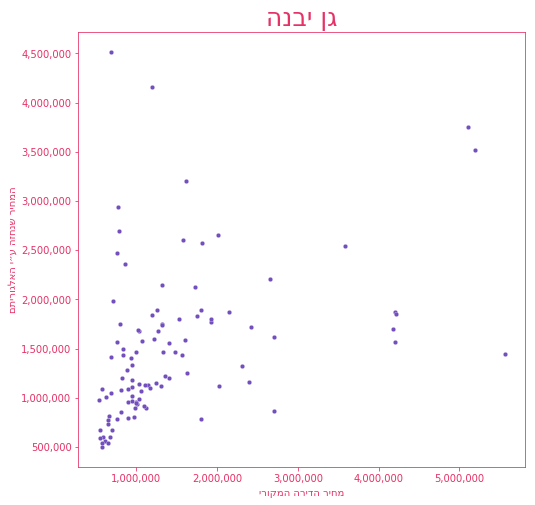

רחובות
R2 Score: 0.8702
MSE sqrt: 174860.5776


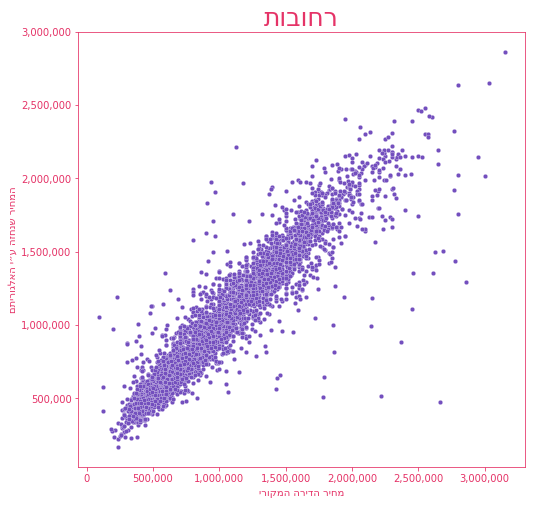

עפולה
R2 Score: 0.8306
MSE sqrt: 119508.7132


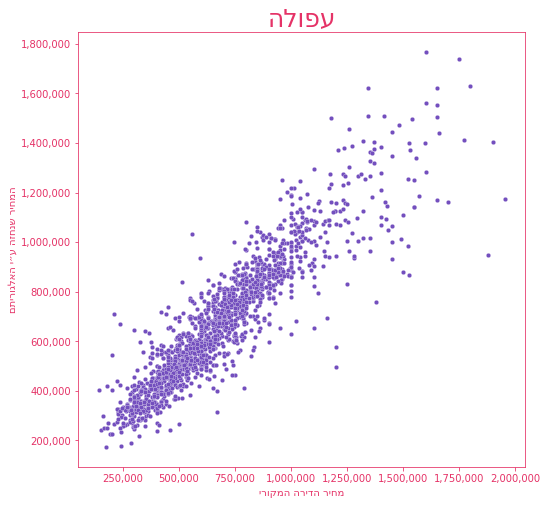

ראשון לציון
R2 Score: 0.8992
MSE sqrt: 174844.5845


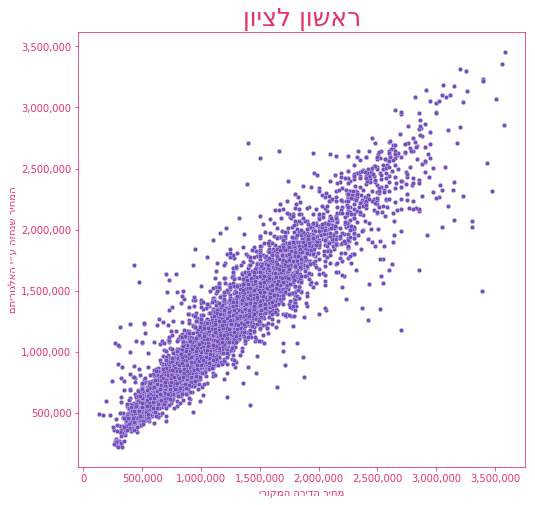

מבשרת ציון
R2 Score: 0.7847
MSE sqrt: 372103.1798


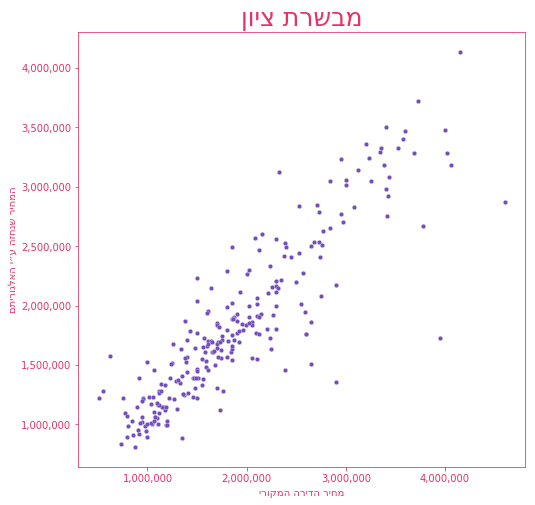

באר יעקב
R2 Score: 0.8564
MSE sqrt: 179892.4821


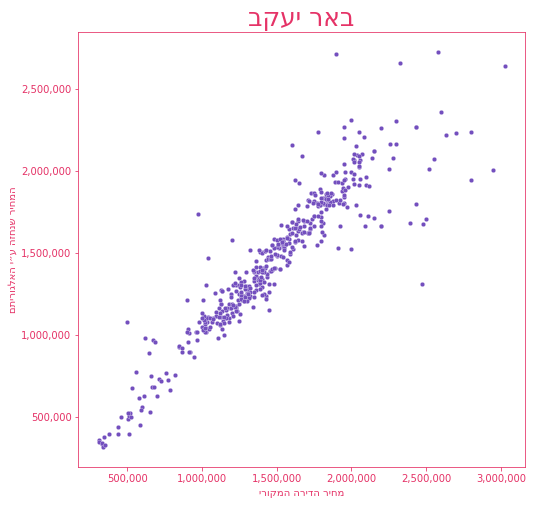

בת ים
R2 Score: 0.8785
MSE sqrt: 190552.6969


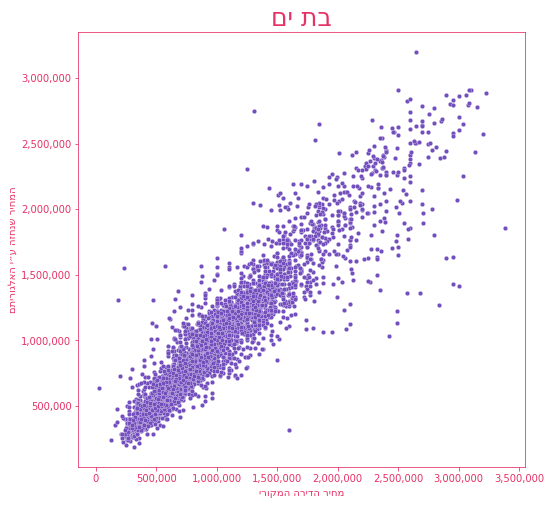

כפר יונה
R2 Score: 0.6670
MSE sqrt: 269469.0927


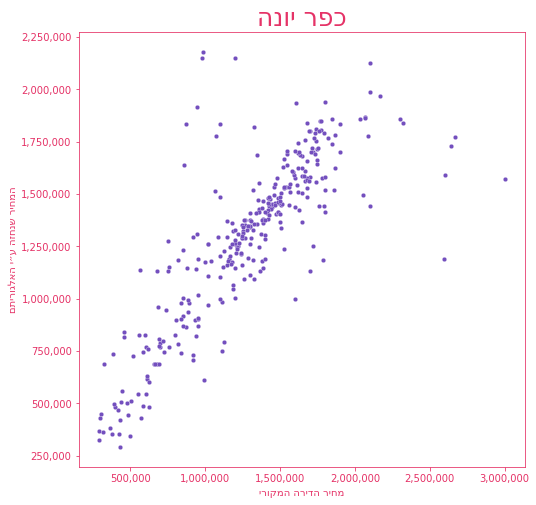

נהריה
R2 Score: 0.8414
MSE sqrt: 153455.8640


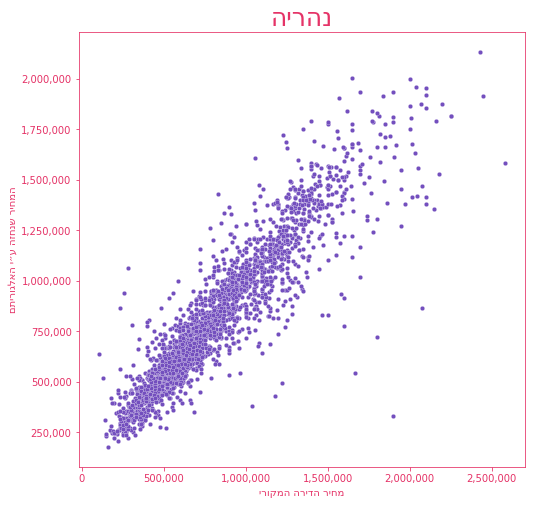

קרית אתא
R2 Score: 0.8454
MSE sqrt: 153786.0733


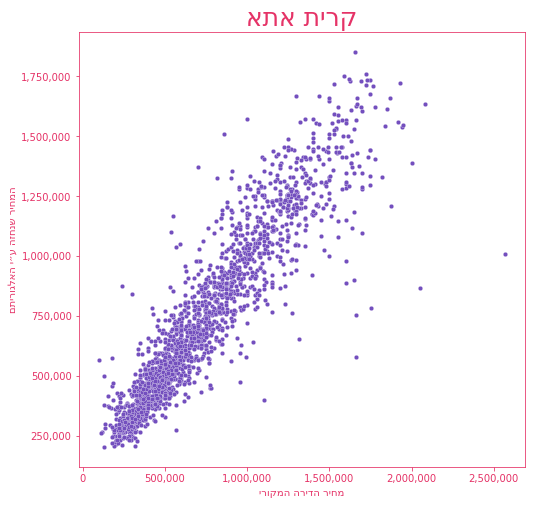

קרית ביאליק
R2 Score: 0.8226
MSE sqrt: 155619.2513


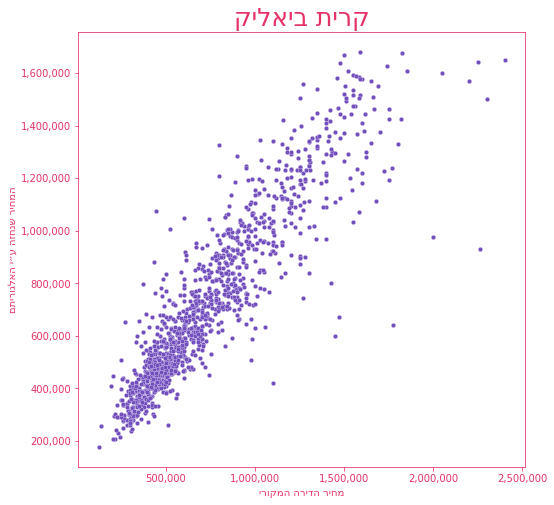

זכרון יעקב
R2 Score: 0.6340
MSE sqrt: 483743.8637


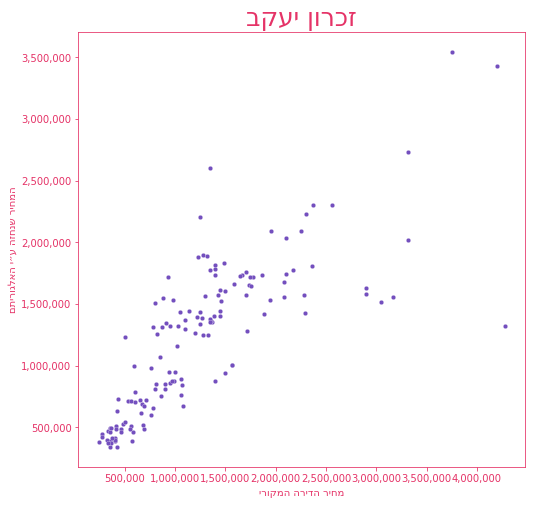

צפת
R2 Score: 0.6896
MSE sqrt: 146818.0144


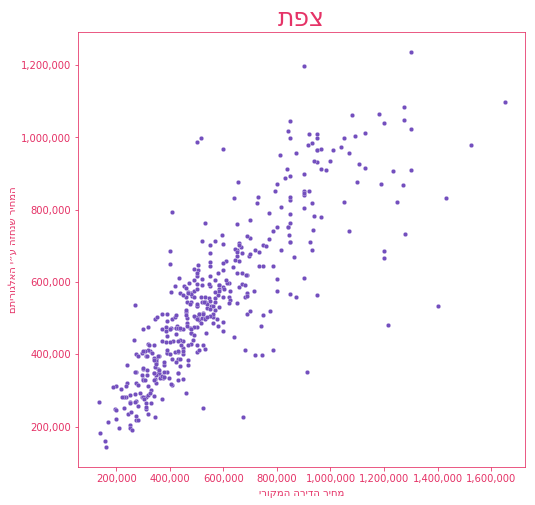

טבריה
R2 Score: 0.7754
MSE sqrt: 135437.9450


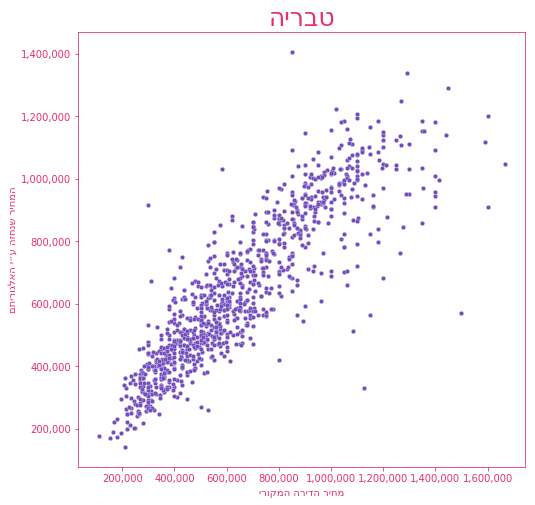

מעלה אדומים
R2 Score: 0.9048
MSE sqrt: 144387.0844


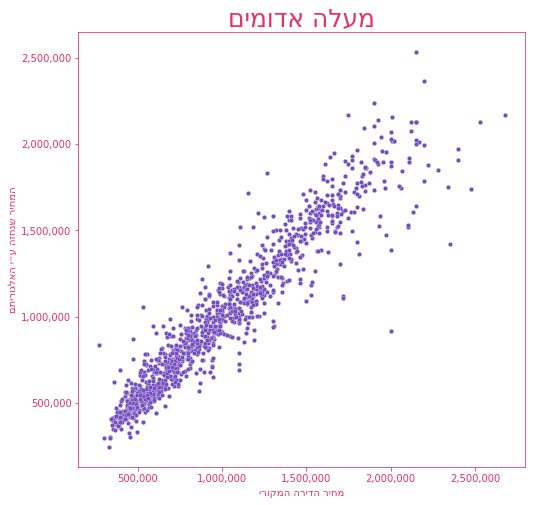

ראש העין
R2 Score: 0.8299
MSE sqrt: 175520.5269


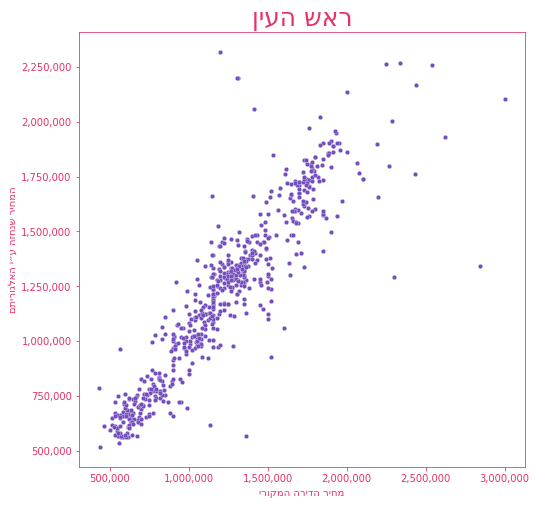

רמלה
R2 Score: 0.8808
MSE sqrt: 156250.1317


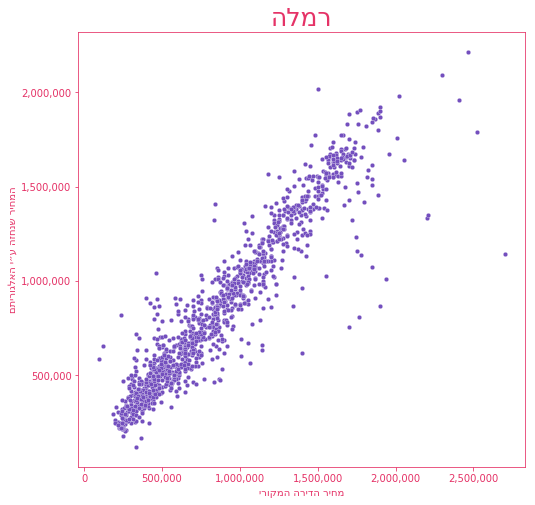

יהוד מונוסון
R2 Score: 0.8297
MSE sqrt: 236389.1846


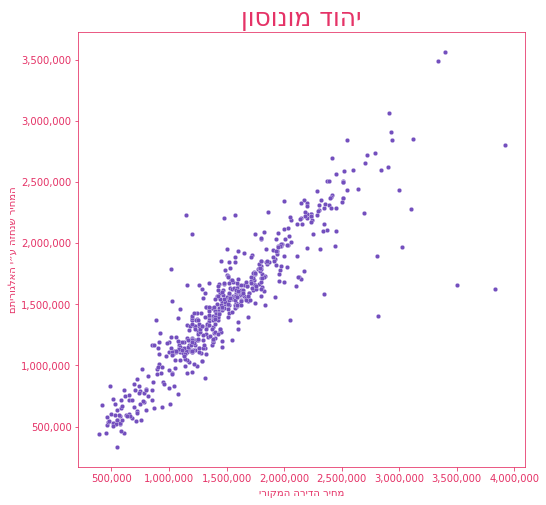

אשקלון
R2 Score: 0.8805
MSE sqrt: 127849.8558


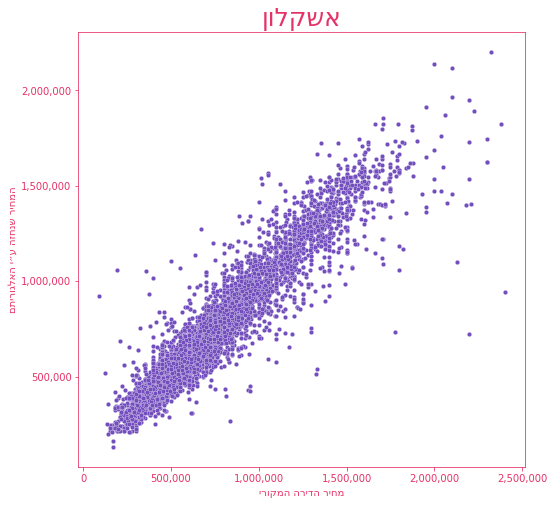

קרית מלאכי
R2 Score: 0.8538
MSE sqrt: 126263.8832


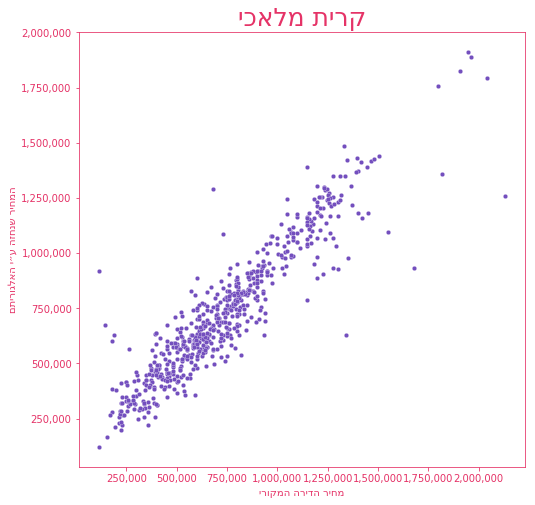

מזכרת בתיה
R2 Score: 0.6951
MSE sqrt: 374629.9714


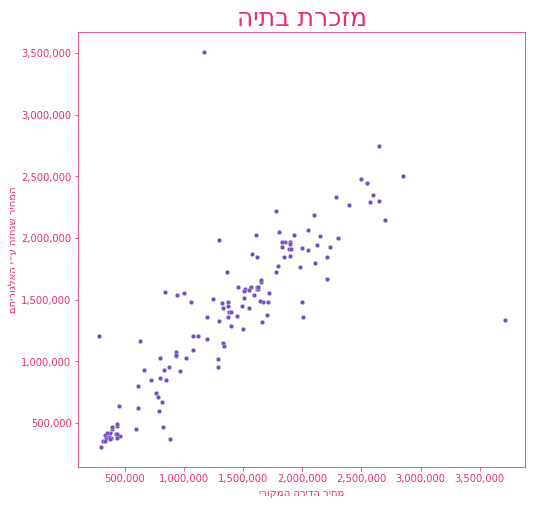

חדרה
R2 Score: 0.8546
MSE sqrt: 159986.4992


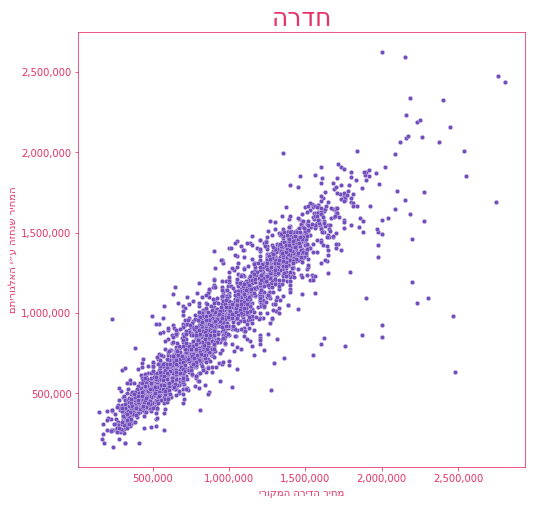

אור עקיבא
R2 Score: 0.8150
MSE sqrt: 162420.4215


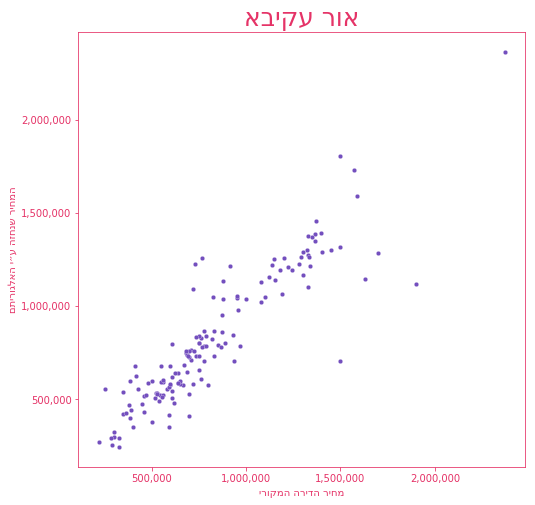

קרית גת
R2 Score: 0.8455
MSE sqrt: 122907.4966


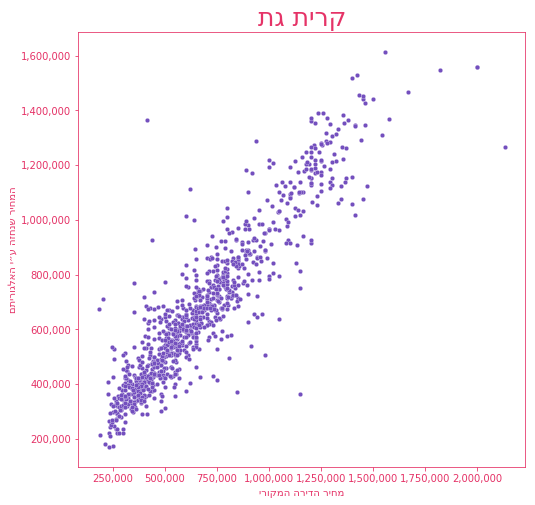

גבעת שמואל
R2 Score: 0.8567
MSE sqrt: 264307.4068


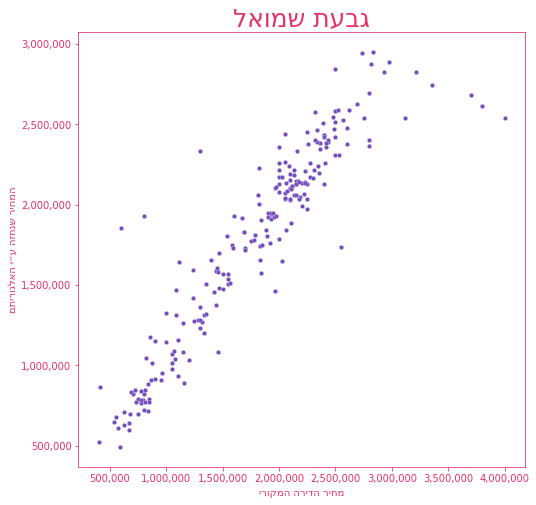

אזור
R2 Score: 0.8890
MSE sqrt: 196346.2216


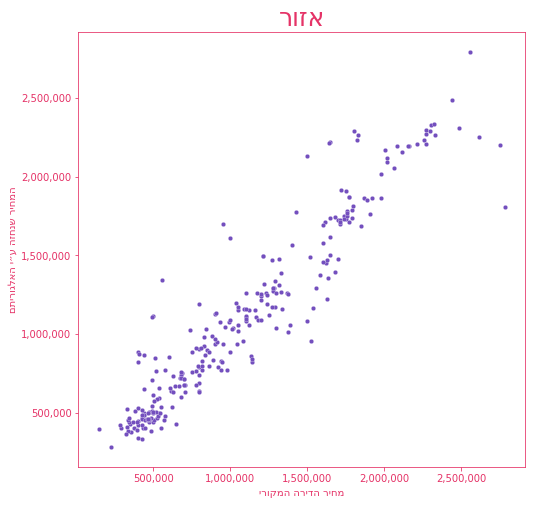

אשדוד
R2 Score: 0.8834
MSE sqrt: 181418.3238


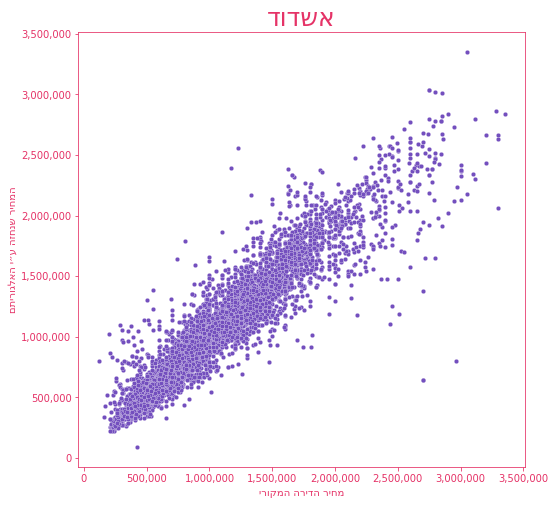

קדימה צורן
R2 Score: 0.7965
MSE sqrt: 266384.7335


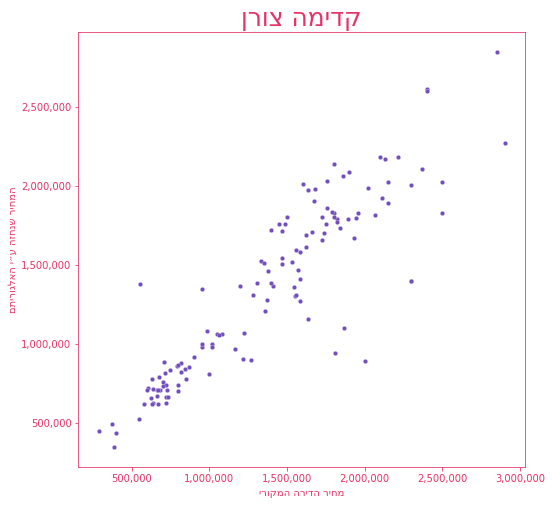

קרית מוצקין
R2 Score: 0.8401
MSE sqrt: 170210.0864


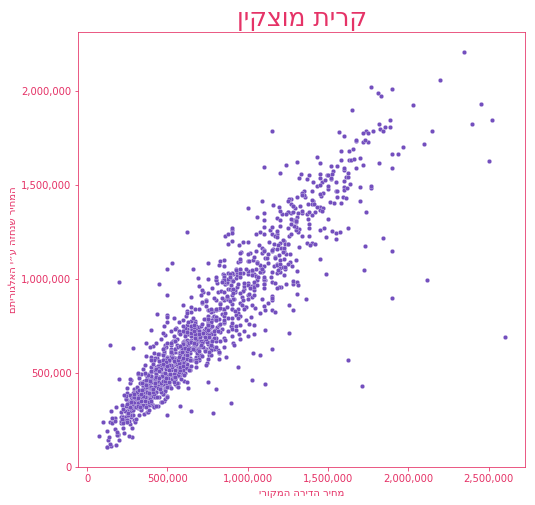

עכו
R2 Score: 0.8562
MSE sqrt: 124527.2745


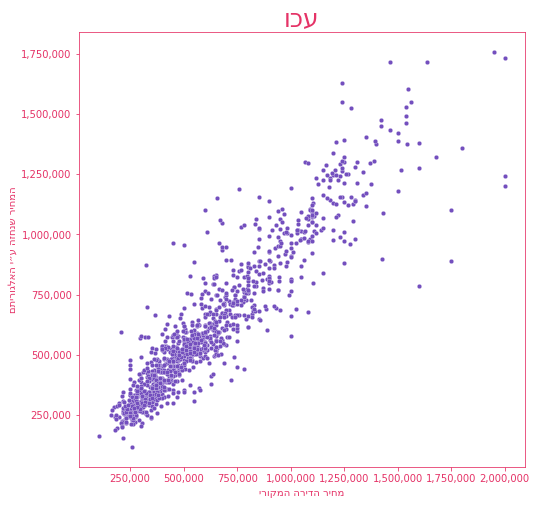

כפר סבא
R2 Score: 0.8650
MSE sqrt: 230470.3354


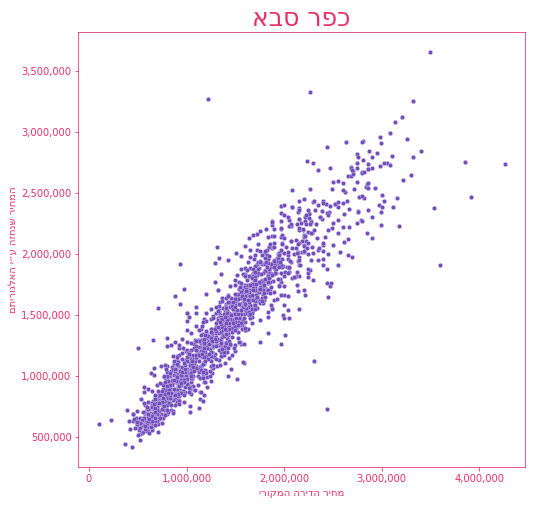

קרית אונו
R2 Score: 0.8736
MSE sqrt: 307392.6927


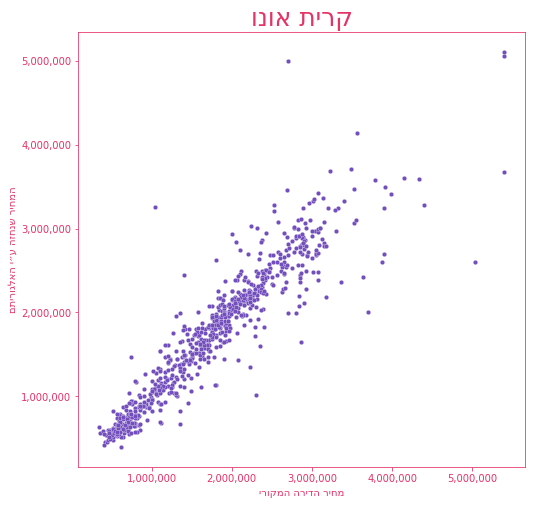

גני תקווה
R2 Score: 0.8696
MSE sqrt: 281827.4973


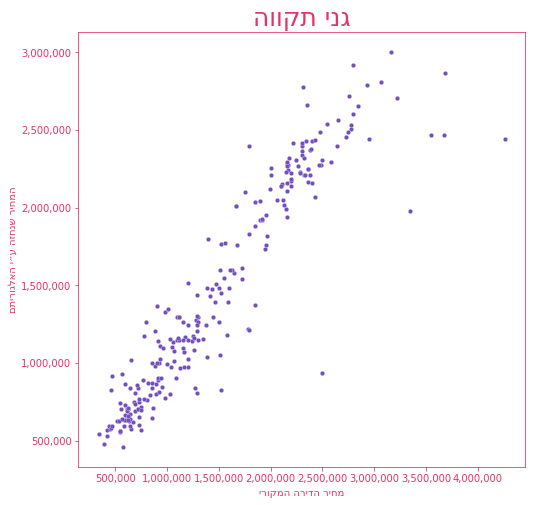

קרית שמונה
R2 Score: 0.6615
MSE sqrt: 103891.1362


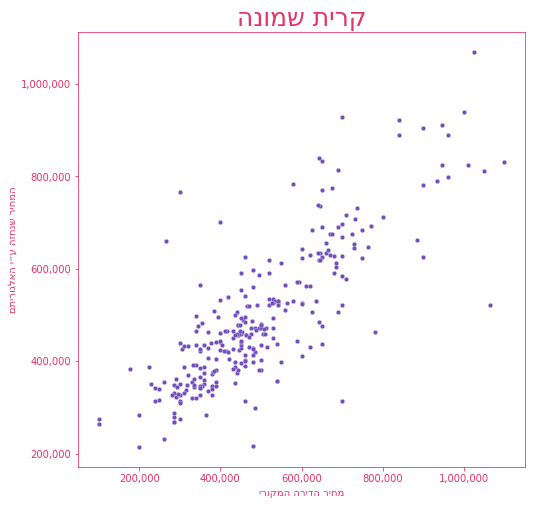

אור יהודה
R2 Score: 0.8610
MSE sqrt: 176667.8902


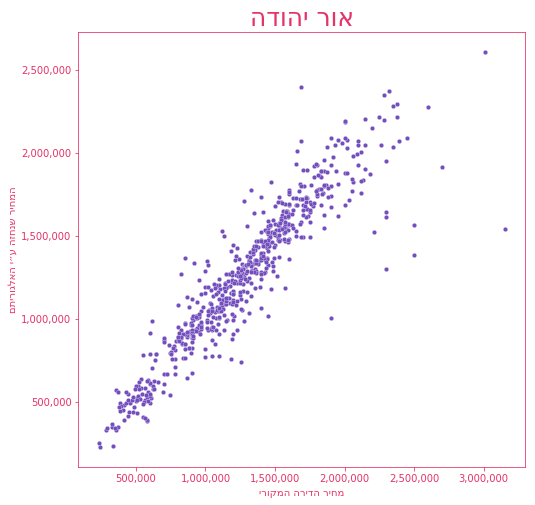

נשר
R2 Score: 0.8775
MSE sqrt: 122459.7811


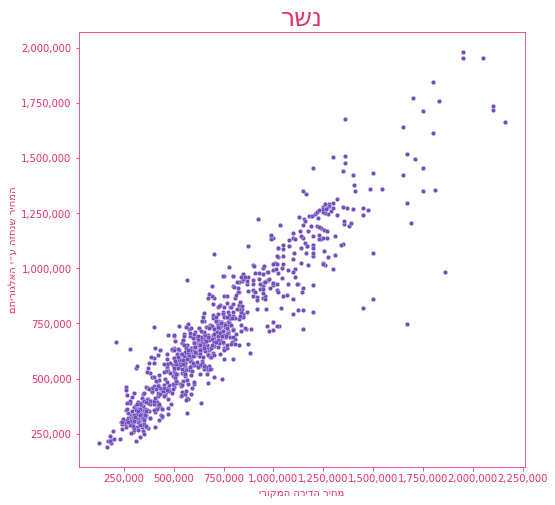

שוהם
R2 Score: 0.7825
MSE sqrt: 299949.6638


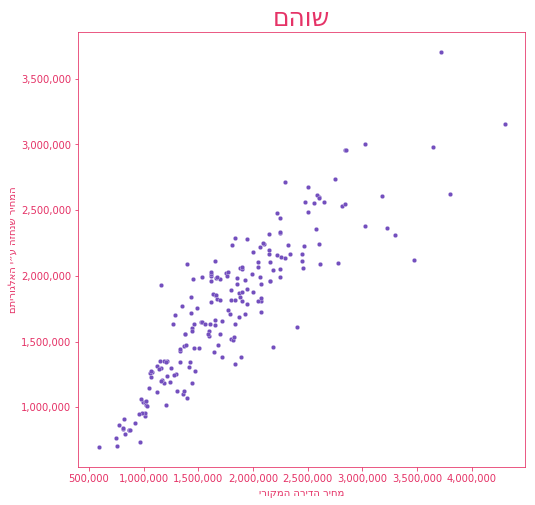

לוד
R2 Score: 0.8617
MSE sqrt: 122242.9570


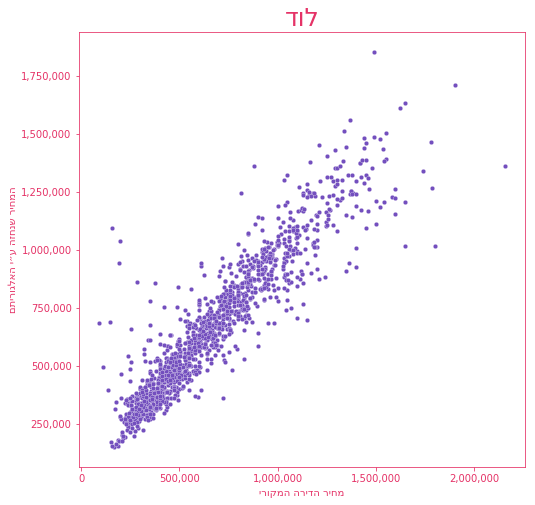

באר שבע
R2 Score: 0.8792
MSE sqrt: 109923.7430


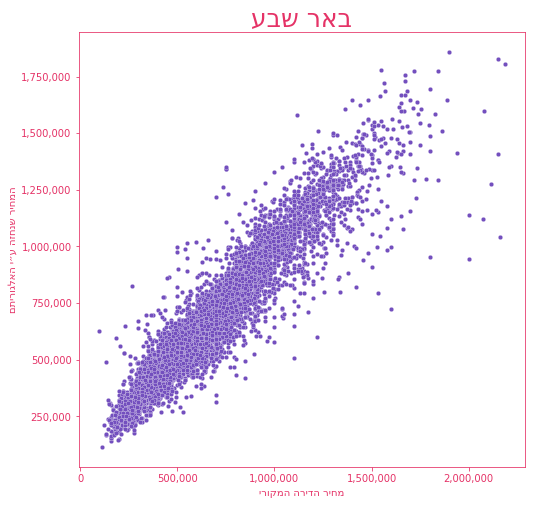

מודיעין מכבים רעות
R2 Score: 0.8850
MSE sqrt: 200661.3434


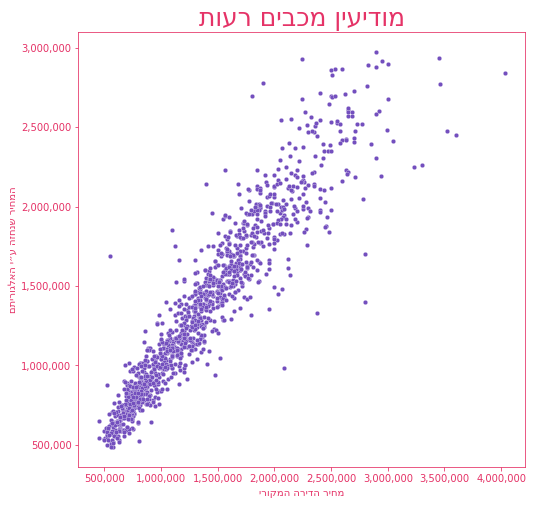

אילת
R2 Score: 0.8204
MSE sqrt: 153680.7188


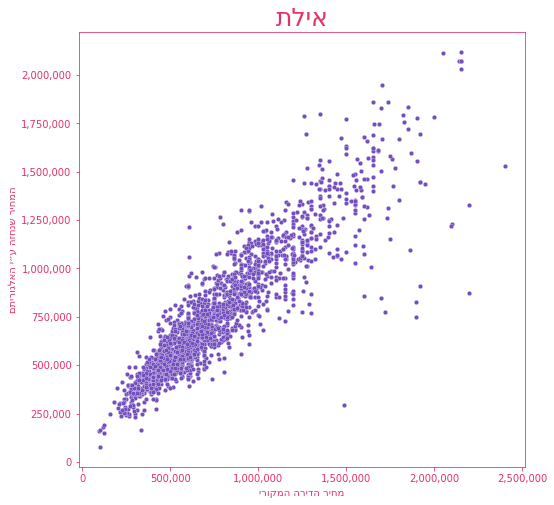

בית שמש
R2 Score: 0.8682
MSE sqrt: 158914.0923


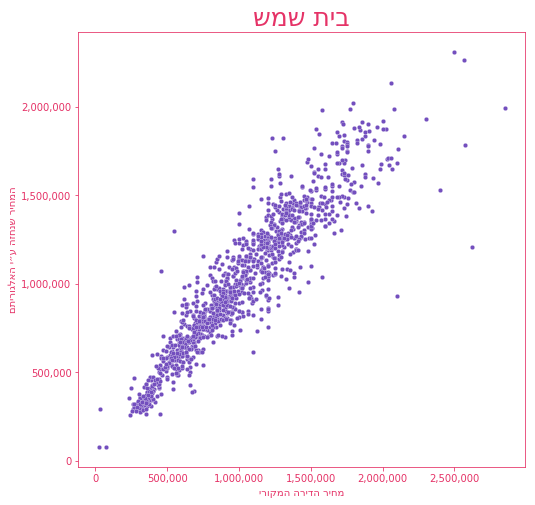

יבנה
R2 Score: 0.9164
MSE sqrt: 141971.1205


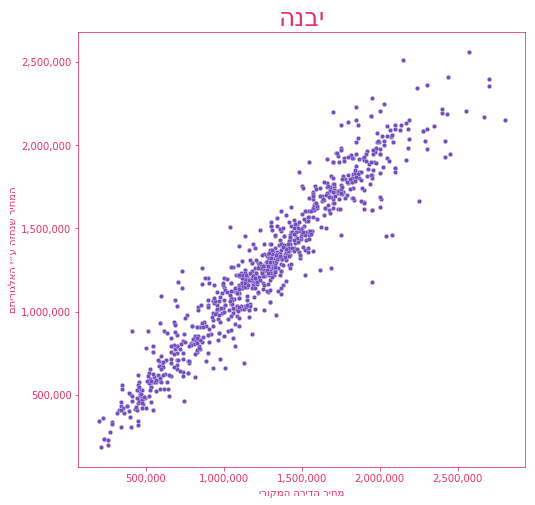

צור הדסה
R2 Score: 0.8288
MSE sqrt: 175636.7248


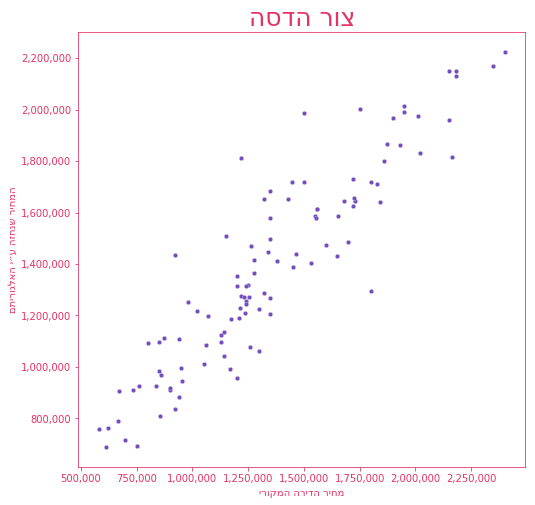

מודיעין עילית
R2 Score: 0.6433
MSE sqrt: 208907.1423


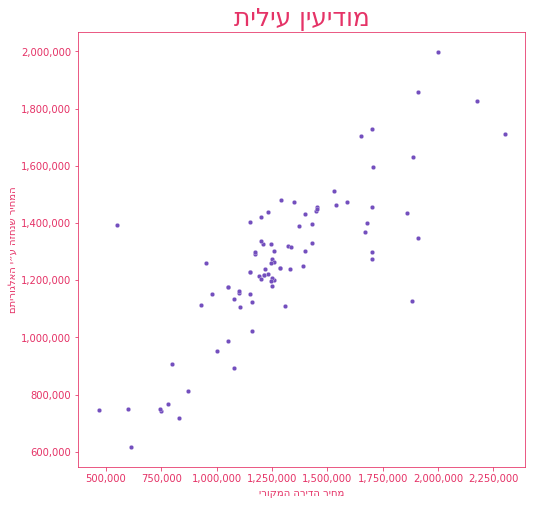

גבעת זאב
R2 Score: 0.7371
MSE sqrt: 275024.2012


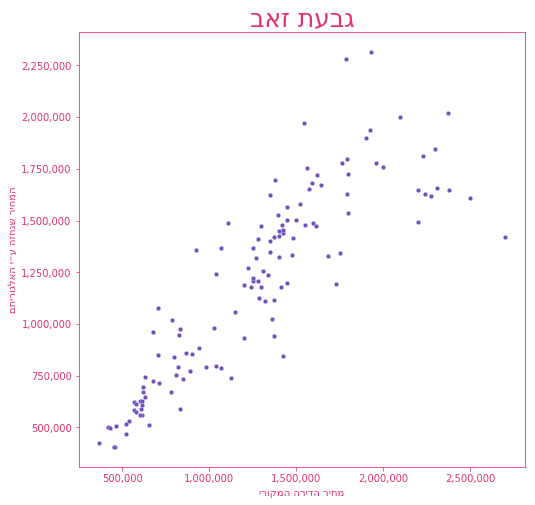

נצרת עילית
R2 Score: 0.7285
MSE sqrt: 158366.3805


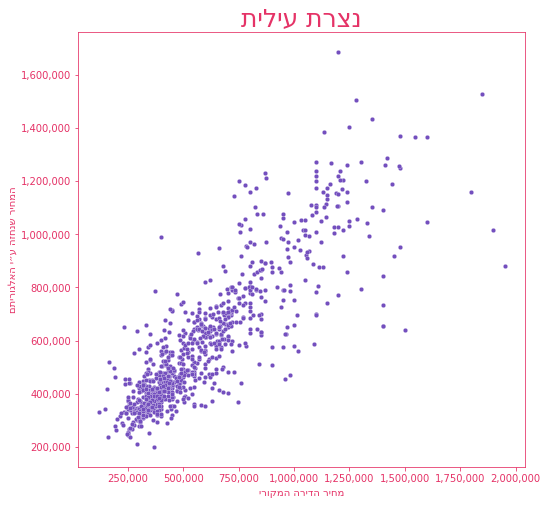

ביתר עילית
R2 Score: 0.8242
MSE sqrt: 181109.7970


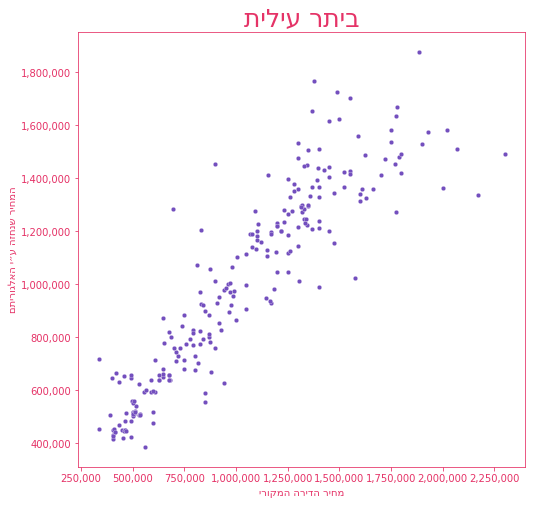

קרית ים
R2 Score: 0.8439
MSE sqrt: 124542.1362


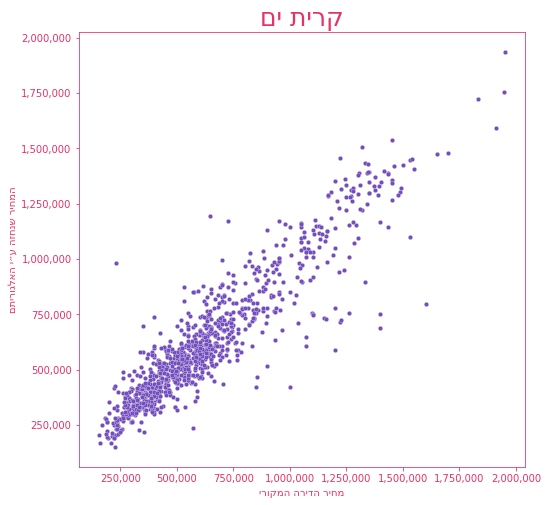

מגדל העמק
R2 Score: 0.8041
MSE sqrt: 118426.9892


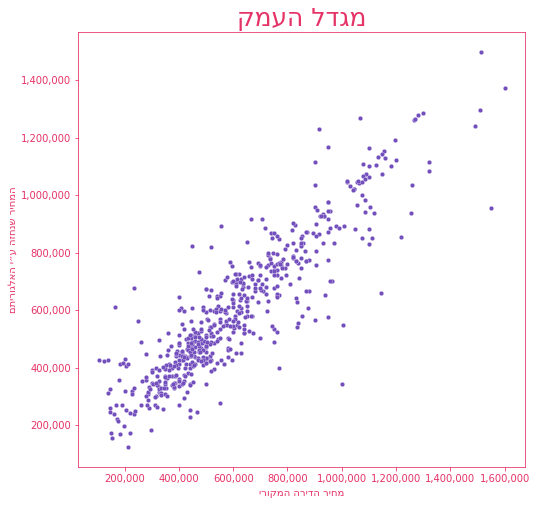

טירת כרמל
R2 Score: 0.8340
MSE sqrt: 162372.8780


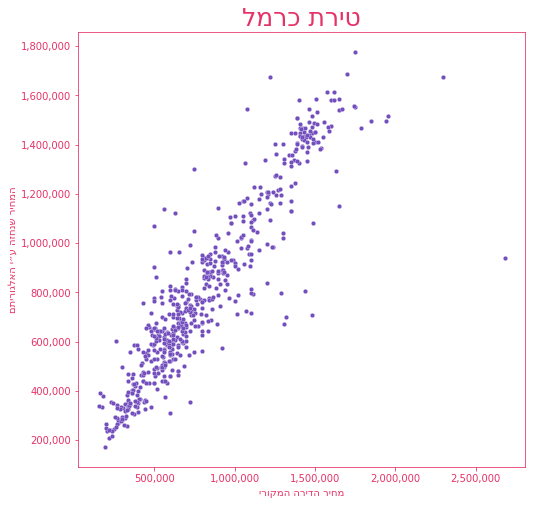

יקנעם עילית
R2 Score: 0.7376
MSE sqrt: 221285.7822


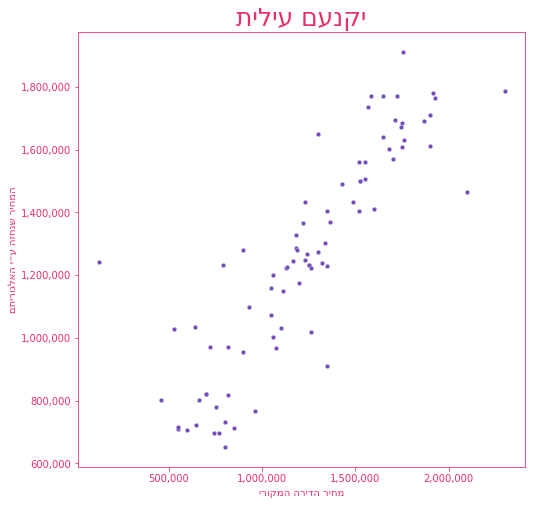

כרמיאל
R2 Score: 0.8648
MSE sqrt: 116523.1252


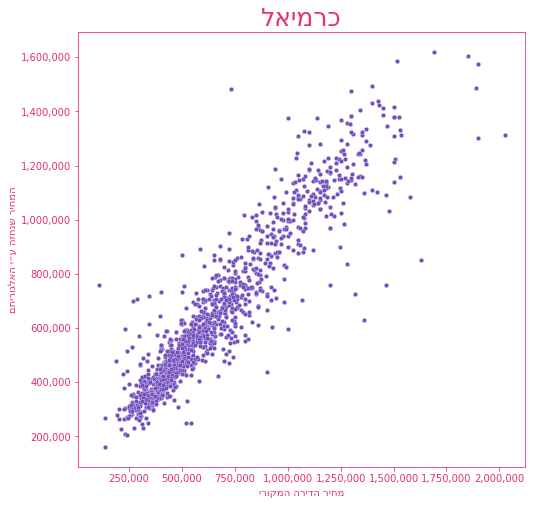

אריאל
R2 Score: 0.8415
MSE sqrt: 133513.5925


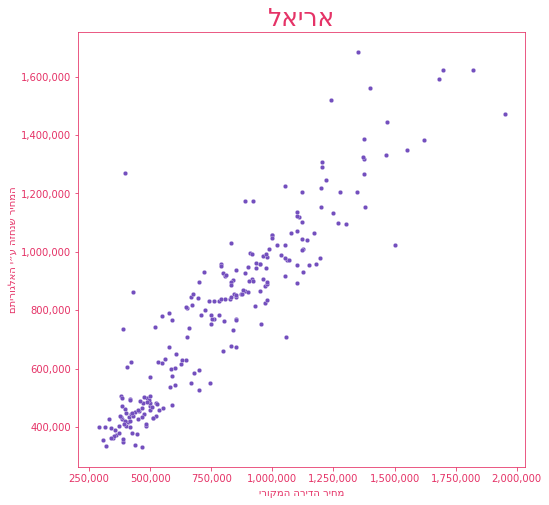

נתיבות
R2 Score: 0.8191
MSE sqrt: 101804.7432


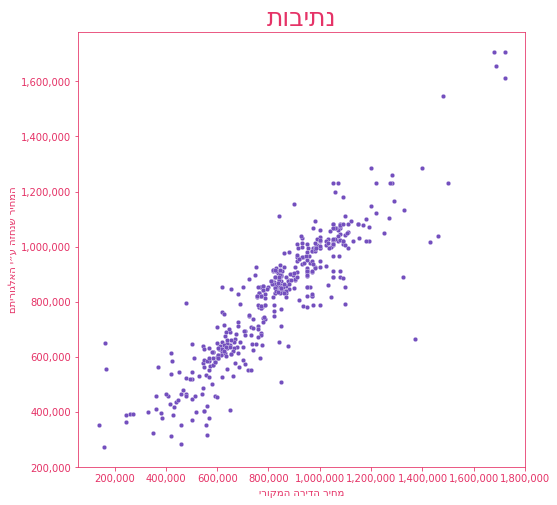

דימונה
R2 Score: 0.7877
MSE sqrt: 107849.8456


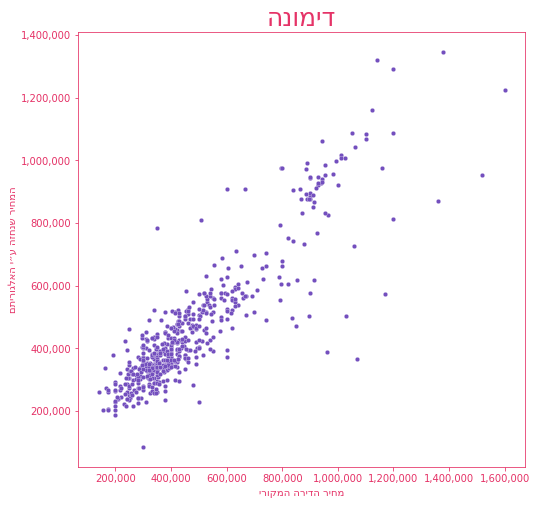

שדרות
R2 Score: 0.7444
MSE sqrt: 130838.1013


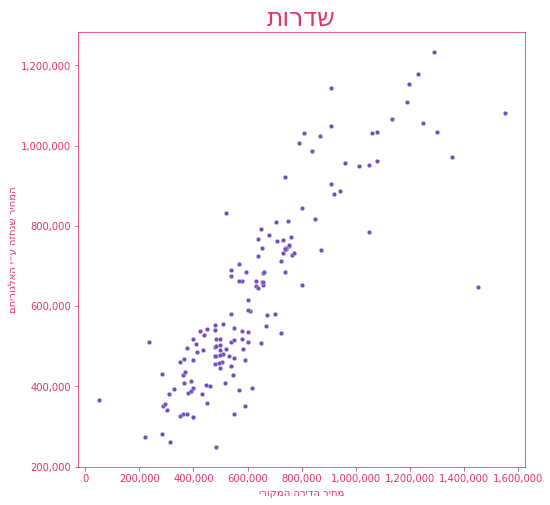

אופקים
R2 Score: 0.7378
MSE sqrt: 118465.4247


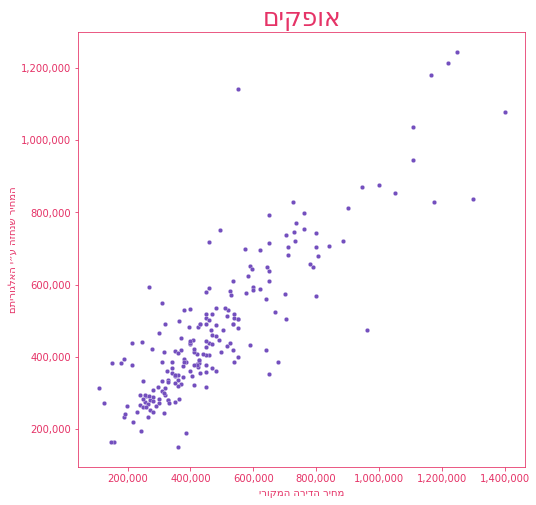

בית שאן
R2 Score: 0.7065
MSE sqrt: 125011.0428


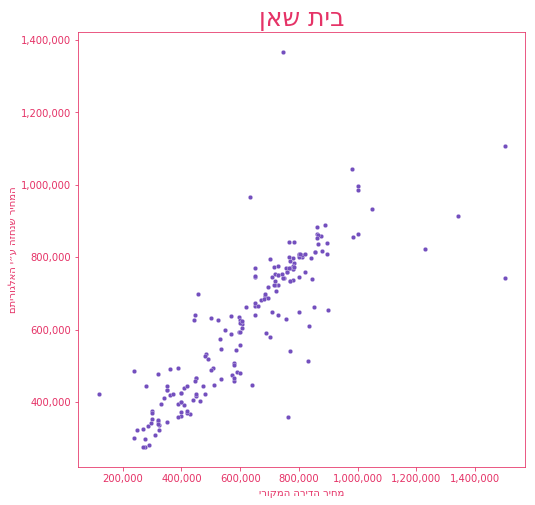

מעלות תרשיחא
R2 Score: 0.6927
MSE sqrt: 160051.5476


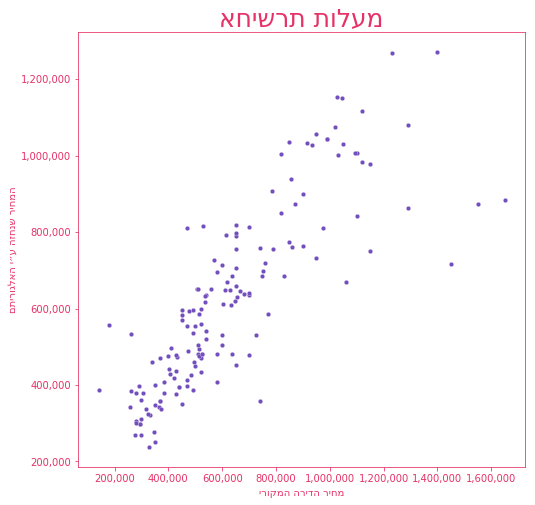

ערד
R2 Score: 0.8102
MSE sqrt: 89139.8880


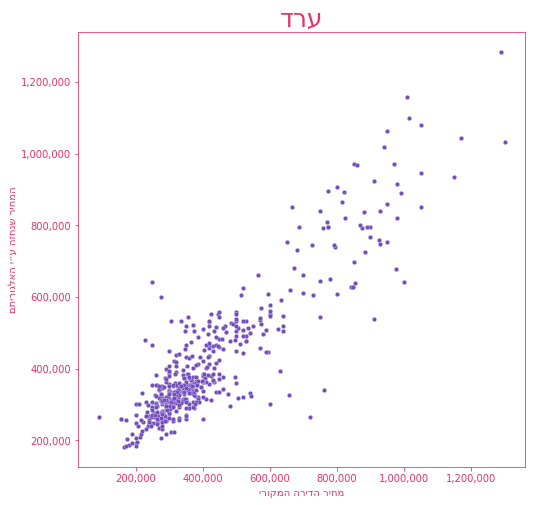

In [7]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    # get the rows of the city
    _df = df.loc[(df['city'] == city)]
    # removing outliers by 'final_price' column
    _df = remove_outlier(_df, 'final_price')
    print(city)

    X = _df[used_features]
    y = _df['final_price']

    # Preprocessing X columns by OneHotEncoder
    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    # saving processor algo for future use
    cities[city]["processor"] = ohe
    
    # split the date into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
#     # for tuning parameters
#     from sklearn.model_selection import GridSearchCV
#     param_grip = {
#         'learning_rate': [0.1, 0.05, 0.02],
#         'max_depth': [4, 6, 8],
#         'min_samples_leaf': [1, 3],
#         'max_features': [1.0, 0.3]
#     }
#     clf = GradientBoostingRegressor(n_estimators=1000)
#     gs_cv = GridSearchCV(clf, param_grip).fit(X_train, y_train)
#     print(gs_cv.best_params_)

    # initiate the Algo
    clf = GradientBoostingRegressor(n_estimators=450,
                                    max_depth=8,
                                    learning_rate=0.05,
                                    max_features=0.3,
                                    random_state=1)
    # fitting the algo with train set
    clf.fit(X_train, y_train)
    # saving the algo for future prediction
    cities[city]["algo"] = clf
    
    # Get Algo score and MSE values
    y_pred = clf.predict(X_test)
    print("R2 Score: %.4f" % clf.score(X_test, y_test))
    mse = mean_squared_error(y_test, clf.predict(X_test))
    cities[city]["mse"] = sqrt(mse)
    print("MSE sqrt: %.4f" % sqrt(mse))
    
    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, s=20, edgecolor="white", linewidth='0.25', c="#734fbe", label="data")
    ax = plt.axes()
    plt.xlabel(bidialg.get_display('מחיר הדירה המקורי'), fontsize=10)
    plt.ylabel(bidialg.get_display('המחיר שנחזה ע״י האלגוריתם'), fontsize=10)
    plt.title(bidialg.get_display(city), fontsize=25)

    # format axes numbers to be with delimiter (e.g. 1000000 -> 1,000,000)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    # Change plot axes colors
    sub_color = '#e53367'
    ax.spines['bottom'].set_color(sub_color)
    ax.spines['top'].set_color(sub_color) 
    ax.spines['right'].set_color(sub_color)
    ax.spines['left'].set_color(sub_color)
    # Use the following to change only the ticks:
    ax.tick_params(axis='x', colors=sub_color)
    ax.tick_params(axis='y', colors=sub_color)
    # And the following to change only the label:
    ax.yaxis.label.set_color(sub_color)
    ax.xaxis.label.set_color(sub_color)
    # And finally the title:
    ax.title.set_color(sub_color)

    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    # Save plot figure
    plt.savefig(os.path.join(folder, "algo_fig.png"), format='png', dpi=300)
    plt.show()


## Testing If Prediction is working

In [8]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4.0, 4.0, 4.0, 4.0, 4.0], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': [2015, 2019, 2010, 2017, 2019],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
    'sale_day_year': [2019, 2019, 2019, 2019, 2019]
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred.tolist())


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות           4.0      2        2015   
1     יצחק רגר     שכונה ב'  דירת בבית קומות           4.0     10        2019   
2    משה פריבס    רמות הרכס  דירת בבית קומות           4.0      2        2010   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות           4.0      2        2017   
4       התקווה   מרכז אזרחי  דירת בבית קומות           4.0      2        2019   

   building_mr     city  sale_day_year  
0          115  באר שבע           2019  
1          116  באר שבע           2019  
2          120  באר שבע           2019  
3          120  באר שבע           2019  
4          113  באר שבע           2019  
[919778.5170454776, 885478.2613326912, 969042.6845390811, 941995.3495299419, 1194883.1842614908]


## Dumping Algo

In [9]:
# saving objects
for city, values in cities.items():
    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    joblib.dump(values["processor"], os.path.join(folder, "processor.joblib"))
    joblib.dump(values["algo"], os.path.join(folder, "algo.joblib"))

    with open(os.path.join(folder, "algo_mse.txt"), 'w') as fig:
        fig.write(str(values["mse"]))
